<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Vacunaci%C3%B3n_MINSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import datetime as dattime
 
## other dependencies
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load database (MINSA Vacunaciones)

In [2]:
import requests 
 
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
# https://www.datosabiertos.gob.pe/node/7564/download
url_minsa = 'MINSA_Vacunaciones.csv'
download_url("https://cloud.minsa.gob.pe/s/ZgXoXqK2KLjRLxD/download", url_minsa)
# ISO-8859-1
datos_vacuna_MINSA = pd.read_csv(url_minsa, encoding = "UTF-8", sep=",")
 
#cut_date = ''
datos_vacuna_MINSA

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210528,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210528,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210528,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
3,20210528,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
4,20210528,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
...,...,...,...,...,...,...,...,...,...,...,...,...
3694000,20210528,05f18908536fcbf526210efa198e1aa5,PERSONAL DE SALUD,30.0,FEMENINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR
3694001,20210528,f7634dd7d75602875a016678cc2d2949,ADULTO MAYOR,68.0,FEMENINO,20210523,1,PFIZER,CALLAO,CALLAO,CALLAO,VENTANILLA
3694002,20210528,7e35f5777815eb8c474483c3270c6aa5,PERSONAL DE SALUD,22.0,MASCULINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR
3694003,20210528,dad115c390dd0af157002a555e6013e4,PERSONAL DE SALUD,22.0,MASCULINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR


# Data Analysis
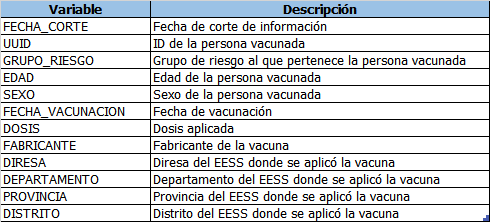

In [3]:
datos_vacuna_MINSA = pd.read_csv(url_minsa, encoding = "UTF-8", sep=",")
datos_vacuna_MINSA.sort_values('FECHA_VACUNACION', inplace=True)
datos_vacuna_MINSA.dropna(inplace=True)
datos_vacuna_MINSA['FECHA_VACUNACION'] = datos_vacuna_MINSA['FECHA_VACUNACION'].astype(str)
datos_vacuna_MINSA.reset_index(drop=True, inplace=True)
datos_vacuna_MINSA['FECHA_VACUNACION'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_VACUNACION'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))
#datos_vacuna_MINSA['FECHA_VACUNACION'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_VACUNACION'])
#datos_vacuna_MINSA['FECHA_CORTE'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_CORTE'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))
datos_vacuna_MINSA['uno'] = 1
datos_vacuna_MINSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554970 entries, 0 to 3554969
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FECHA_CORTE       int64         
 1   UUID              object        
 2   GRUPO_RIESGO      object        
 3   EDAD              float64       
 4   SEXO              object        
 5   FECHA_VACUNACION  datetime64[ns]
 6   DOSIS             int64         
 7   FABRICANTE        object        
 8   DIRESA            object        
 9   DEPARTAMENTO      object        
 10  PROVINCIA         object        
 11  DISTRITO          object        
 12  uno               int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 352.6+ MB


# Análisis Peru

In [4]:
df_peru = datos_vacuna_MINSA.sort_values('FECHA_VACUNACION')
df_peru.reset_index(inplace=True, drop=True)
df_peru.tail()
 
 
df_peru.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'PERSONAL DE SEGURIDAD', 'POLICIA NACIONAL DEL PERU',
       'ESTUDIANTES DE CIENCIAS DE LA SALUD', 'BRIGADISTAS',
       'PERSONAL MILITAR Ó FF AA', 'ADULTO MAYOR', 'BOMBERO'],
      dtype=object)

In [5]:
#df_peru_sin_duplicados = df_peru.drop(['UUID', 'FECHA_CORTE'], 1)
#df_peru_sin_duplicados = df_peru_sin_duplicados.drop_duplicates()
 
df_peru_reg_sin_dup_zc = df_peru.groupby(['FECHA_VACUNACION']).sum()
df_peru_reg_sin_dup_zc.to_csv('VacunacionDía_Peru.csv')
 
 
#df_peru_dosis['Dosis1'] = df_peru.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_peru_Dosis1 = df_peru.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_peru_Dosis1['DOSIS2'] = df_peru.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 
df_peru_Dosis2 = df_peru.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
dosis_12 = [df_peru_Dosis1['uno'].sum(),df_peru_Dosis2['uno'].sum()] 
dosis_12

[2511535, 1043435]

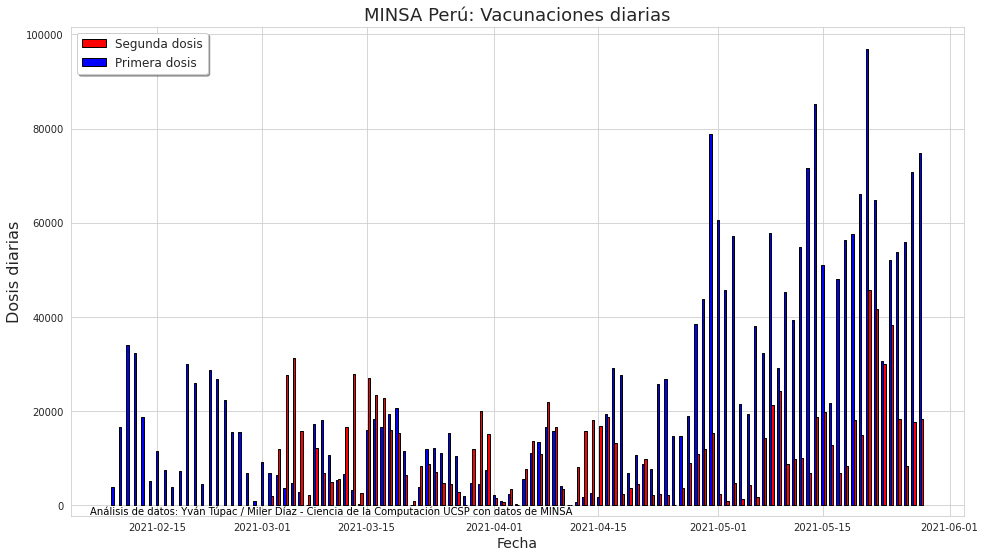

In [6]:
#Code Yvan
 
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.xaxis_date()
barWidth = 0.3
df_peru_Dosis2['FECHA_VACUNACION'] = mdates.date2num(df_peru_Dosis2.index)
 
ax1.bar(df_peru_Dosis2['FECHA_VACUNACION']+barWidth,df_peru_Dosis2.uno, label='Segunda dosis', width = barWidth, color='r',edgecolor='k')
ax1.bar(df_peru_Dosis1.index,df_peru_Dosis1.uno, label='Primera dosis', width = barWidth, color='b',edgecolor='k')
ax1.set_ylim(-2200)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-6'), -1800, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Perú: Vacunaciones diarias',fontsize=18)
plt.savefig('MINSA_PeruVacunasDosisDia.pdf')
plt.show()

In [7]:
""" Code Miler """
df_peru_diario = df_peru.pivot_table(index=['FECHA_VACUNACION'], columns=['DOSIS'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario = df_peru_diario.reset_index().rename_axis(None, axis=1)
df_peru_diario.columns = ['FECHA_VACUNACION', 'DOSIS_1', 'DOSIS_2']

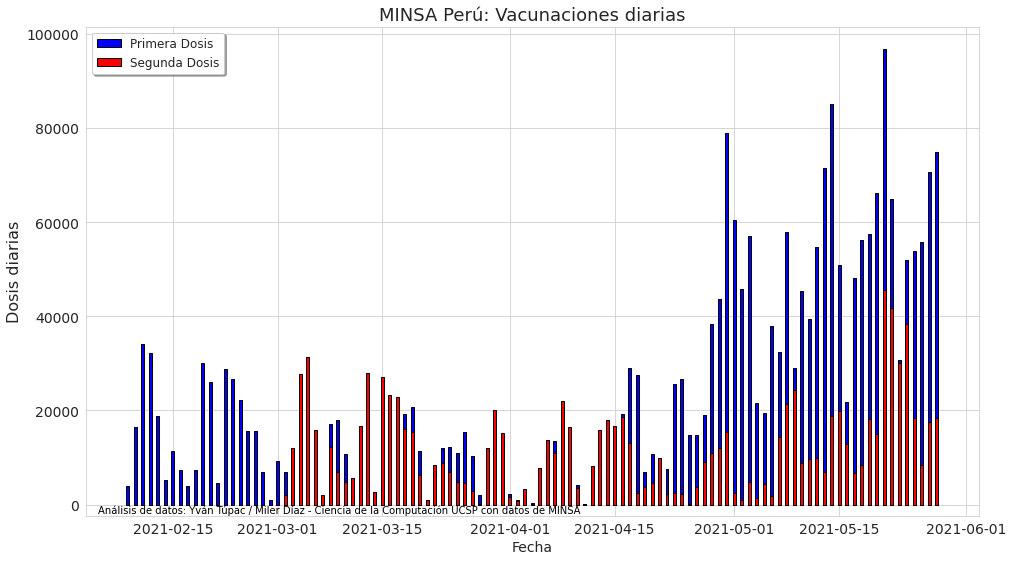

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barswidth = 0.4
#df_peru_diario['FECHA_VACUNACION'] = mdates.date2num(df_peru_diario['FECHA_VACUNACION'])
ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_1'], width = barswidth,  align='center', color='b', edgecolor='k', label='Primera Dosis')
ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_2'], width = barswidth,  align='center',  color = 'r', edgecolor='k', label='Segunda Dosis')
 
plt.title('MINSA Perú: Vacunaciones diarias',fontsize=18)
 
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_ylim(-2400)
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)
ax1.tick_params(labelsize=14)
 
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-5'), -1800, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.show()
plt.clf()

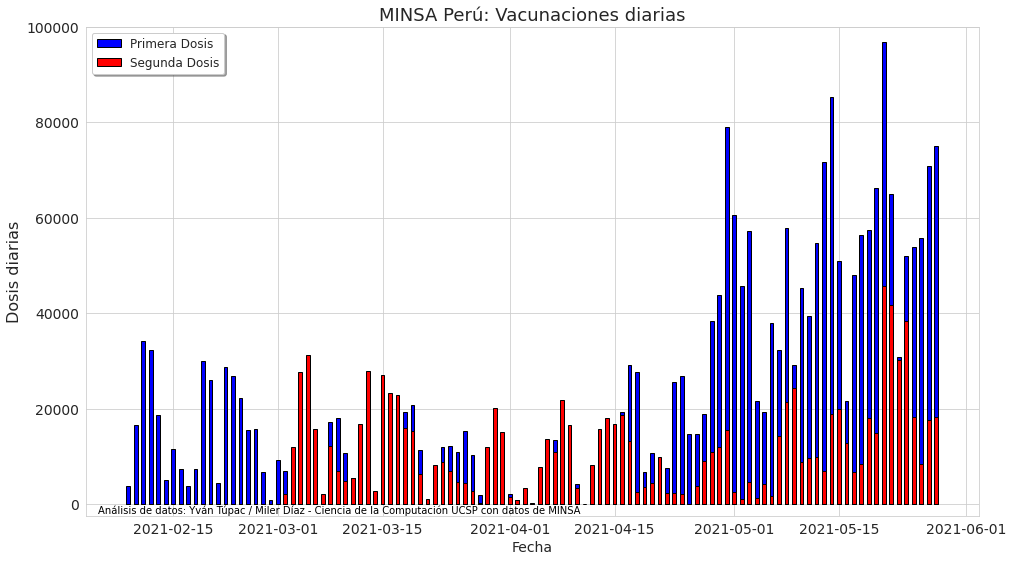

<Figure size 432x288 with 0 Axes>

In [9]:
""" Code Miler """
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barswidth = 0.5
bars01 = ax1.bar(df_peru_diario['FECHA_VACUNACION'],df_peru_diario['DOSIS_1'], width = barswidth,  align='center', color='b', edgecolor='k', label='Primera Dosis')
#ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_2'],  align='center', bottom=df_peru_diario['DOSIS_1'], color = 'r', edgecolor='k', label='Segunda Dosis')
bars02 = ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_2'], width = barswidth,  align='center',  color = 'r', edgecolor='k', label='Segunda Dosis')
 
plt.title('MINSA Perú: Vacunaciones diarias',fontsize=18)
 
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_ylim(-2400, 100000)
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)
ax1.tick_params(labelsize=14)
 
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-5'), -1800, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.show()
plt.clf()

In [10]:
""" Code Miler """
df_peru_diario_dosis_1 = df_peru[df_peru['DOSIS'] == 1]
df_peru_diario_dosis_2 = df_peru[df_peru['DOSIS'] == 2]
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1_por_grupo_riesgo.reset_index() #.rename_axis(None, axis=1)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2_por_grupo_riesgo.reset_index() #.rename_axis(None, axis=1)
df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'] = pd.to_datetime(df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'])
df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'] = pd.to_datetime(df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'])
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1_por_grupo_riesgo.set_index(['FECHA_VACUNACION'])
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2_por_grupo_riesgo.set_index(['FECHA_VACUNACION'])

#display(df_peru_diario_dosis_1_por_grupo_riesgo.tail(3))
#display(df_peru_diario_dosis_2_por_grupo_riesgo.tail(3))
df_peru_diario_dosis_2_por_grupo_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2021-03-02 to 2021-05-28
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ADULTO MAYOR                         88 non-null     float64
 1   BOMBERO                              88 non-null     float64
 2   BRIGADISTAS                          88 non-null     float64
 3   ESTUDIANTES DE CIENCIAS DE LA SALUD  88 non-null     float64
 4   PERSONAL DE SALUD                    88 non-null     float64
 5   PERSONAL DE SEGURIDAD                88 non-null     float64
 6   PERSONAL MILITAR Ó FF AA             88 non-null     float64
 7   POLICIA NACIONAL DEL PERU            88 non-null     float64
 8   TRABAJADOR Ó PERSONAL DE LIMPIEZA    88 non-null     float64
dtypes: float64(9)
memory usage: 6.9 KB


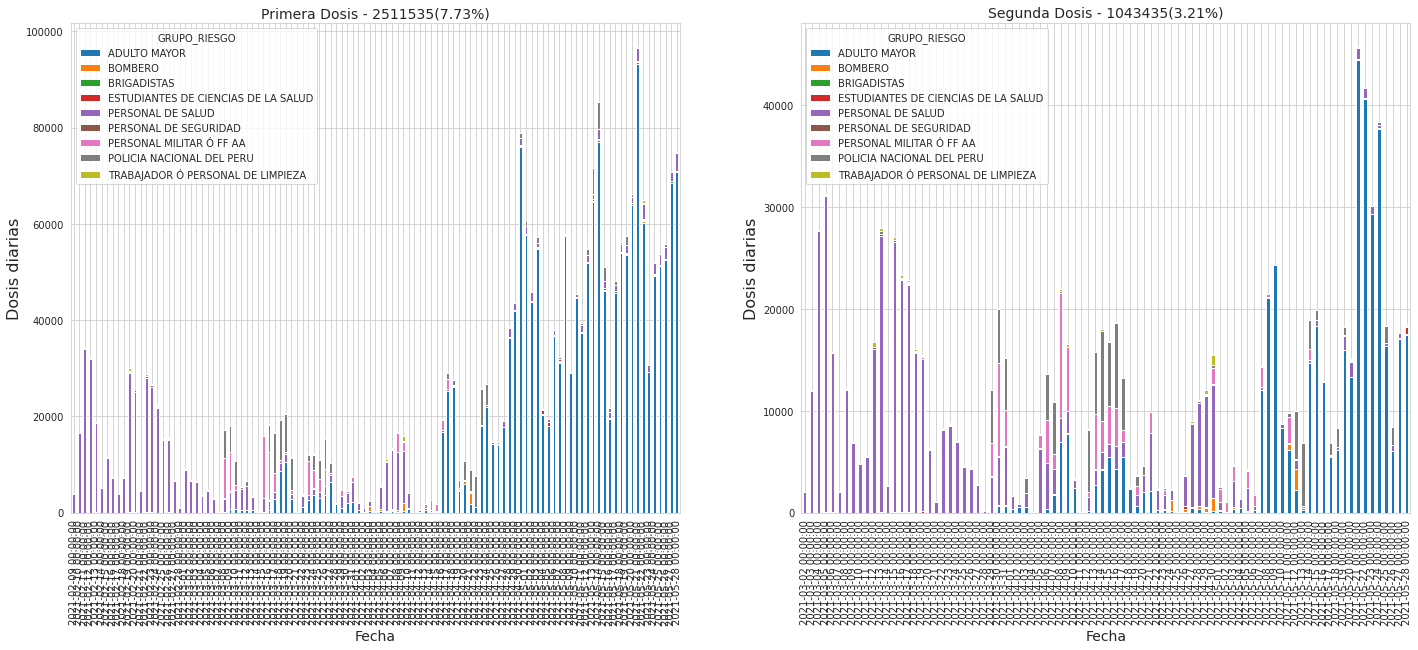

<Figure size 432x288 with 0 Axes>

In [11]:
""" Code Miler """
poblacion_peru = 32510000
 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 9))
#axe = plt.subplot(111)
#ax1.xaxis_date()
#ax2.xaxis_date() 

df_peru_diario_dosis_1_por_grupo_riesgo.plot(kind='bar', stacked = True, ax=ax1)
df_peru_diario_dosis_2_por_grupo_riesgo.plot(kind='bar', stacked = True, ax=ax2)
 
plt.title('MINSA Perú: Vacunaciones diarias por Grupo de Riesgo',fontsize=18)
 
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_title('Primera Dosis - ' + str(int(df_peru_diario_dosis_1_por_grupo_riesgo.sum().sum())) + '(' + str(round(df_peru_diario_dosis_1_por_grupo_riesgo.sum().sum() / poblacion_peru * 100, 2)) + '%)', fontsize=14)
 
ax2.set_ylabel('Dosis diarias', fontsize=16)
ax2.set_xlabel('Fecha', fontsize=14)
ax2.set_title('Segunda Dosis - ' + str(int(df_peru_diario_dosis_2_por_grupo_riesgo.sum().sum())) + '(' + str(round(df_peru_diario_dosis_2_por_grupo_riesgo.sum().sum() / poblacion_peru * 100, 2)) + '%)', fontsize=14)
 
#ax1.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
#ax2.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
plt.show()
plt.clf()

In [12]:
df_peru.FABRICANTE.unique()

array(['SINOPHARM', 'PFIZER', 'ASTRAZENECA'], dtype=object)

In [13]:
df_peru_SINOPHARM = df_peru.query('FABRICANTE == "SINOPHARM"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_peru_ASTRAZENECA =  df_peru.query('FABRICANTE == "ASTRAZENECA"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_peru_PFIZER    = df_peru.query('FABRICANTE == "PFIZER"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
Fabricantes = [df_peru_SINOPHARM['uno'].sum(),df_peru_PFIZER['uno'].sum(),df_peru_ASTRAZENECA['uno'].sum()] 
Fabricantes

[930812, 2378736, 245422]

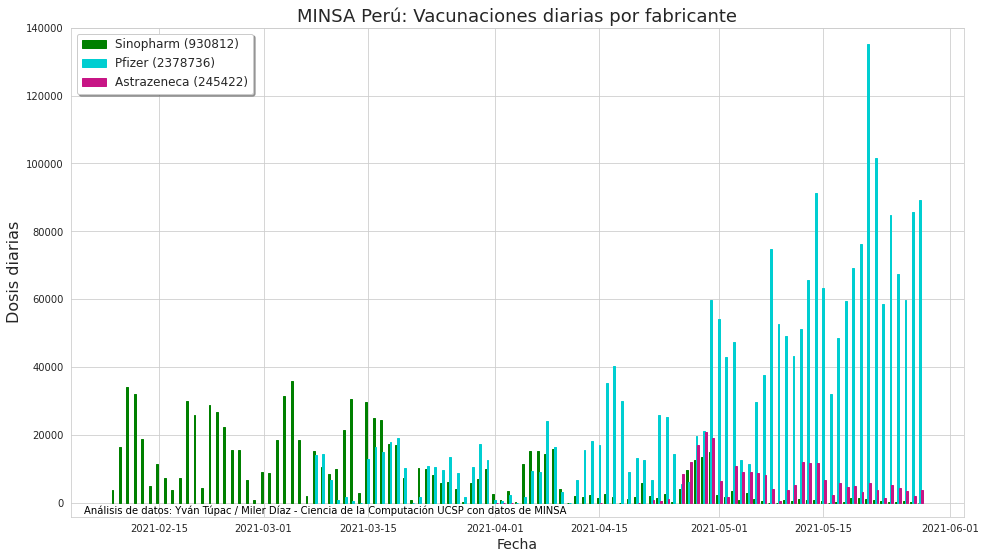

In [14]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.25 
df_peru_SINOPHARM['FECHA_VACUNACION'] = mdates.date2num(df_peru_SINOPHARM.index)
df_peru_ASTRAZENECA['FECHA_VACUNACION'] = mdates.date2num(df_peru_ASTRAZENECA.index)
 
ax1.xaxis_date()
#mediumvioletred 
#darkturquoise
ax1.bar(df_peru_SINOPHARM['FECHA_VACUNACION'] - barWidth,df_peru_SINOPHARM.uno, label='Sinopharm (' + str(df_peru_SINOPHARM['uno'].sum())+')', width = barWidth, color='g',edgecolor='g')
ax1.bar(df_peru_PFIZER.index,df_peru_PFIZER.uno, label='Pfizer ('+ str(df_peru_PFIZER['uno'].sum())+')',width = barWidth, color='darkturquoise',edgecolor='darkturquoise')
ax1.bar(df_peru_ASTRAZENECA['FECHA_VACUNACION'] + barWidth,df_peru_ASTRAZENECA.uno, label='Astrazeneca ('+str(df_peru_ASTRAZENECA['uno'].sum())+')',width = barWidth, color='mediumvioletred',edgecolor='mediumvioletred')

ax1.set_ylim(-4000,140000)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-5'), -3200, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Perú: Vacunaciones diarias por fabricante',fontsize=18)
plt.savefig('MINSA_PeruVacunasFabricanteDia.pdf')
plt.show()

# Análisis Vacunaciones en Región Arequipa

In [15]:
df_arequipa_region = datos_vacuna_MINSA[datos_vacuna_MINSA['DEPARTAMENTO'] == 'AREQUIPA'].sort_values('FECHA_VACUNACION')
df_arequipa_region.reset_index(inplace=True, drop=True)
df_arequipa_region.tail()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,uno
158995,20210528,800af3efde227fcba2ffe0edfb70a3ba,PERSONAL DE SALUD,54.0,MASCULINO,2021-05-28,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,1
158996,20210528,9bcb5142fd81e47b6b3dff1b915a1638,ADULTO MAYOR,68.0,MASCULINO,2021-05-28,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,PAUCARPATA,1
158997,20210528,1297dafa4bae887820abc203c886bfde,ADULTO MAYOR,62.0,MASCULINO,2021-05-28,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,PAUCARPATA,1
158998,20210528,44e7af251660b5e28d5ad5c17896cd03,ADULTO MAYOR,65.0,MASCULINO,2021-05-28,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,PAUCARPATA,1
158999,20210528,5ecbd29451443869cf5905e9d3582dfb,ADULTO MAYOR,66.0,FEMENINO,2021-05-28,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,PAUCARPATA,1


In [16]:
#df_arequipa_region_sin_duplicados = df_arequipa_region.drop(['UUID', 'FECHA_CORTE'], 1)
#df_arequipa_region_sin_duplicados = df_arequipa_region_sin_duplicados.drop_duplicates()
 
df_arequipa_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159000 entries, 0 to 158999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FECHA_CORTE       159000 non-null  int64         
 1   UUID              159000 non-null  object        
 2   GRUPO_RIESGO      159000 non-null  object        
 3   EDAD              159000 non-null  float64       
 4   SEXO              159000 non-null  object        
 5   FECHA_VACUNACION  159000 non-null  datetime64[ns]
 6   DOSIS             159000 non-null  int64         
 7   FABRICANTE        159000 non-null  object        
 8   DIRESA            159000 non-null  object        
 9   DEPARTAMENTO      159000 non-null  object        
 10  PROVINCIA         159000 non-null  object        
 11  DISTRITO          159000 non-null  object        
 12  uno               159000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memor

## Arequipa: vacuna por fabricante

In [17]:
df_arequipa_region_fabricante = df_arequipa_region.pivot_table(index=['FECHA_VACUNACION'], columns=['FABRICANTE'], values='UUID', aggfunc=len).fillna(0)
df_arequipa_region_fabricante = df_arequipa_region_fabricante.reset_index()
df_arequipa_region_fabricante['FECHA_VACUNACION'] = pd.to_datetime(df_arequipa_region_fabricante['FECHA_VACUNACION'])
df_arequipa_region_fabricante = df_arequipa_region_fabricante.set_index(['FECHA_VACUNACION'])
df_arequipa_region_fabricante['Prom_SINOPHARM'] = df_arequipa_region_fabricante['SINOPHARM'].rolling(window=7).mean()
df_arequipa_region_fabricante['Prom_PFIZER'] = df_arequipa_region_fabricante['PFIZER'].rolling(window=7).mean()

df_arequipa_region_fabricante.tail(5)

FABRICANTE,PFIZER,SINOPHARM,Prom_SINOPHARM,Prom_PFIZER
FECHA_VACUNACION,,,,
2021-05-24,8518.0,0.0,0.142857,4669.000000
2021-05-25,2554.0,0.0,0.000000,4777.428571
2021-05-26,11177.0,0.0,0.000000,6089.428571
2021-05-27,7411.0,0.0,0.000000,6719.714286
2021-05-28,3414.0,0.0,0.000000,5668.571429


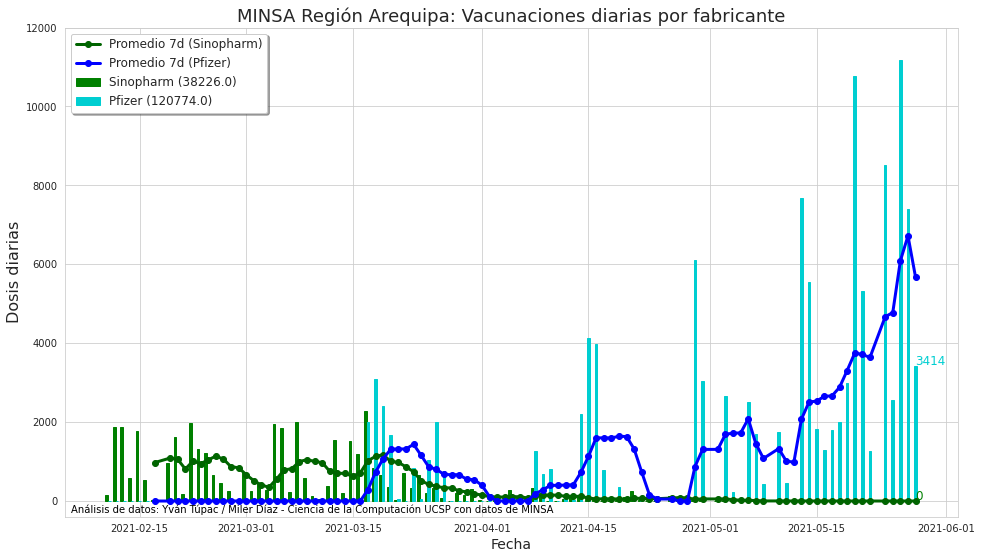

In [18]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.35 
df_arequipa_region_fabricante['FECHA_VACUNACION'] = mdates.date2num(df_arequipa_region_fabricante.index)
#df_peru_ASTRAZENECA['FECHA_VACUNACION'] = mdates.date2num(df_peru_ASTRAZENECA.index)
 
ax1.xaxis_date()
#mediumvioletred 
#darkturquoise
ax1.bar(df_arequipa_region_fabricante['FECHA_VACUNACION'] - barWidth,df_arequipa_region_fabricante['SINOPHARM'], label='Sinopharm (' + str(df_arequipa_region_fabricante['SINOPHARM'].sum())+')', width = barWidth, color='g',edgecolor='g')
ax1.bar(df_arequipa_region_fabricante['FECHA_VACUNACION'],df_arequipa_region_fabricante['PFIZER'], label='Pfizer ('+ str(df_arequipa_region_fabricante['PFIZER'].sum())+')',width = barWidth, color='darkturquoise',edgecolor='darkturquoise')
ax1.plot_date(df_arequipa_region_fabricante.index, df_arequipa_region_fabricante['Prom_SINOPHARM'],color='darkgreen', label='Promedio 7d (Sinopharm)',linestyle='-',linewidth=3.0)
ax1.plot_date(df_arequipa_region_fabricante.index, df_arequipa_region_fabricante['Prom_PFIZER'],color='blue', label='Promedio 7d (Pfizer)',linestyle='-',linewidth=3.0)


ax1.set_ylim(-400,12000)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)

style = dict(size=12, color='g')
ax1.text(pd.to_datetime('2021-05-28'), df_arequipa_region_fabricante['SINOPHARM'].tail(1)+30, str(int(df_arequipa_region_fabricante['SINOPHARM'].tail(1))), **style)
style = dict(size=12, color='darkturquoise')
ax1.text(pd.to_datetime('2021-05-28'), df_arequipa_region_fabricante['PFIZER'].tail(1)+30, str(int(df_arequipa_region_fabricante['PFIZER'].tail(1))), **style)

style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-6'), -300, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Región Arequipa: Vacunaciones diarias por fabricante',fontsize=18)
plt.savefig('MINSA_ArequipaVacunasFabricanteDia.pdf')
plt.show()

## Análisis vacuna por Dosis

In [19]:
df_arequipa_region.DOSIS.unique()

array([1, 2])

In [20]:
df_arequipa_region_dosis = df_arequipa_region.pivot_table(index=['FECHA_VACUNACION'], columns=['DOSIS'], values='UUID', aggfunc=len).fillna(0)

df_arequipa_region_dosis.columns =['Dosis1', 'Dosis2']

df_arequipa_region_dosis = df_arequipa_region_dosis.reset_index()
df_arequipa_region_dosis['FECHA_VACUNACION'] = pd.to_datetime(df_arequipa_region_dosis['FECHA_VACUNACION'])
df_arequipa_region_dosis = df_arequipa_region_dosis.set_index(['FECHA_VACUNACION'])
df_arequipa_region_dosis.tail(3)


,Dosis1,Dosis2
FECHA_VACUNACION,,
2021-05-26,11065.0,112.0
2021-05-27,7254.0,157.0
2021-05-28,3168.0,246.0


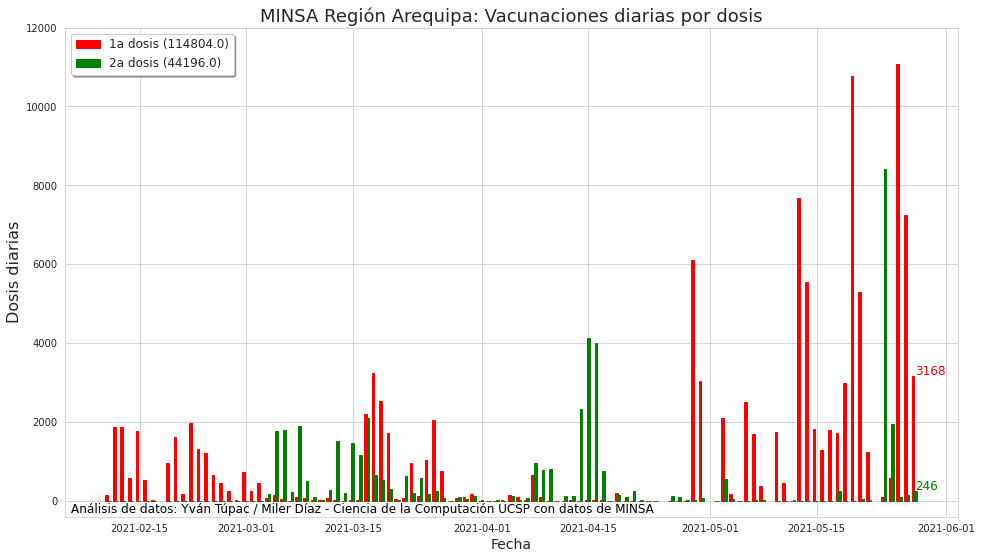

In [21]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.35 
df_arequipa_region_dosis['FECHA_VACUNACION'] = mdates.date2num(df_arequipa_region_dosis.index)

ax1.xaxis_date()
ax1.bar(df_arequipa_region_dosis['FECHA_VACUNACION'] - barWidth,df_arequipa_region_dosis['Dosis1'], label='1a dosis (' + str(df_arequipa_region_dosis['Dosis1'].sum())+')', width = barWidth, color='r',edgecolor='r')
ax1.bar(df_arequipa_region_dosis['FECHA_VACUNACION'],df_arequipa_region_dosis['Dosis2'], label='2a dosis ('+ str(df_arequipa_region_dosis['Dosis2'].sum())+')',width = barWidth, color='green',edgecolor='green')

ax1.set_ylim(-400,12000)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=12, color='r')
ax1.text(pd.to_datetime('2021-05-28'), df_arequipa_region_dosis['Dosis1'].tail(1)+30, str(int(df_arequipa_region_dosis['Dosis1'].tail(1))), **style)
style = dict(size=12, color='g')
ax1.text(pd.to_datetime('2021-05-28'), df_arequipa_region_dosis['Dosis2'].tail(1)+30, str(int(df_arequipa_region_dosis['Dosis2'].tail(1))), **style)
style = dict(size=12, color='k')
ax1.text(pd.to_datetime('2021-02-6'), -300, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)



plt.title('MINSA Región Arequipa: Vacunaciones diarias por dosis',fontsize=18)
plt.savefig('MINSA_ArequipaVacunasDosisDia.pdf')
plt.show()

In [22]:
df_arequipa_region.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'PERSONAL DE SEGURIDAD', 'POLICIA NACIONAL DEL PERU',
       'ESTUDIANTES DE CIENCIAS DE LA SALUD', 'PERSONAL MILITAR Ó FF AA',
       'ADULTO MAYOR', 'BRIGADISTAS', 'BOMBERO'], dtype=object)

# Arequipa: Vacunación por Dosis

In [23]:
""" Based on Code Miler """
df_AQP_diario_dosis = df_peru[df_peru['DOSIS'] == 1]
df_peru_diario_dosis_2 = df_peru[df_peru['DOSIS'] == 2]
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'] = df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'] = df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
display(df_peru_diario_dosis_1_por_grupo_riesgo.tail())
display(df_peru_diario_dosis_2_por_grupo_riesgo.tail())

,FECHA_VACUNACION,ADULTO MAYOR,BOMBERO,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
104,2021-05-24,49212.0,180.0,253.0,25.0,2211.0,3.0,0.0,83.0,30.0
105,2021-05-25,51274.0,1.0,181.0,80.0,2121.0,3.0,2.0,165.0,11.0
106,2021-05-26,52397.0,5.0,198.0,87.0,2552.0,1.0,0.0,567.0,5.0
107,2021-05-27,68499.0,1.0,365.0,45.0,1847.0,11.0,0.0,0.0,7.0
108,2021-05-28,70741.0,28.0,283.0,31.0,3734.0,2.0,0.0,1.0,80.0


,FECHA_VACUNACION,ADULTO MAYOR,BOMBERO,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
83,2021-05-24,37688.0,1.0,43.0,23.0,316.0,3.0,5.0,259.0,5.0
84,2021-05-25,16331.0,4.0,16.0,17.0,283.0,3.0,0.0,1700.0,3.0
85,2021-05-26,6073.0,1.0,2.0,0.0,516.0,0.0,46.0,1721.0,0.0
86,2021-05-27,17016.0,0.0,1.0,151.0,456.0,3.0,1.0,2.0,3.0
87,2021-05-28,17461.0,78.0,13.0,654.0,150.0,1.0,10.0,0.0,4.0


In [24]:
df_AQP_Dosis1 = df_arequipa_region.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis1['Dosis2'] = df_arequipa_region.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_AQP_Dosis2 = df_arequipa_region.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 
#df_AQP_Dosis = df_arequipa_region_sin_duplicados.sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis["D1"] = df_arequipa_region_sin_duplicados.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis["D2"] = df_arequipa_region_sin_duplicados.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis.tail(8)

In [25]:
[df_AQP_Dosis1['uno'].sum(),df_AQP_Dosis2['uno'].sum()]

[114804, 44196]

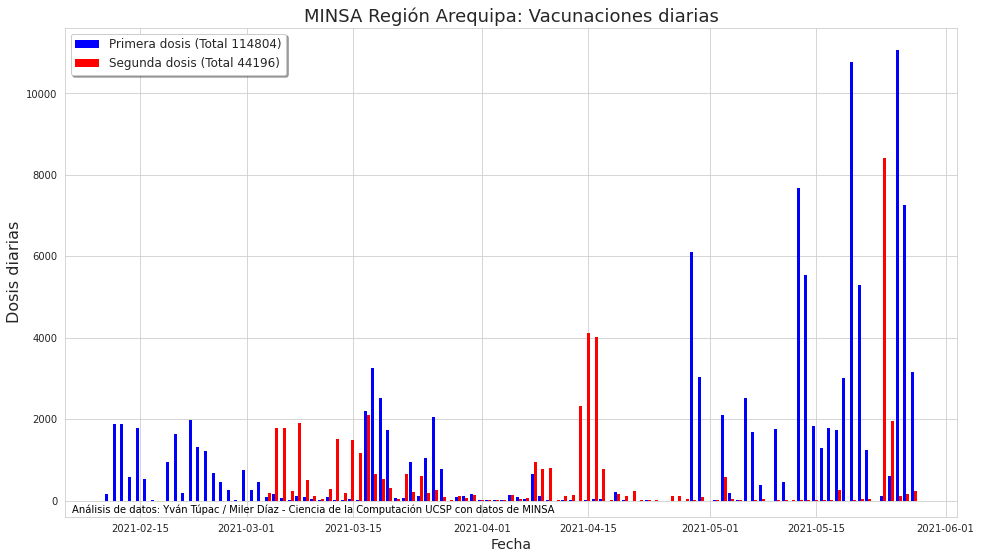

In [26]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
# Labels
#sns.barplot(data=df_AQP_Dosis1, x=df_AQP_Dosis1.index, y="DOSIS", label='Primera dosis ', ax=ax1,color='b')
#sns.barplot(data=df_AQP_Dosis2, x=df_AQP_Dosis2.index, y="DOSIS", label='Segunda Dosis',  ax=ax1,color='r')
 
barWidth = 0.4 
df_AQP_Dosis1['FECHA_VACUNACION'] = mdates.date2num(df_AQP_Dosis1.index)
 
ax1.xaxis_date()
ax1.bar(df_AQP_Dosis1['FECHA_VACUNACION']-barWidth,df_AQP_Dosis1.uno, label='Primera dosis (Total '+str(df_AQP_Dosis1['uno'].sum()) +')', width = barWidth, color='b',edgecolor='k',align='center',linewidth =0)
ax1.bar(df_AQP_Dosis2.index,df_AQP_Dosis2.uno, label='Segunda dosis (Total '+str(df_AQP_Dosis2['uno'].sum()) +')', width = barWidth, color='r',edgecolor='k',align='center',linewidth =0)
ax1.set_ylim(-400)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')

ax1.text(pd.to_datetime('2021-02-6'), -300, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)

plt.title('MINSA Región Arequipa: Vacunaciones diarias',fontsize=18)
plt.savefig('MINSA_ArequipaVacunasDosisDia.pdf')
plt.show()

In [27]:
# Resumen vacunaciones
print('Vacunaciones MINSA Arequipa\n')
print('1ra dosis : ',int(df_AQP_Dosis1['uno'].sum()))
print('2da dosis : ',int(df_AQP_Dosis2['uno'].sum()))


Vacunaciones MINSA Arequipa

1ra dosis :  114804
2da dosis :  44196


# Arequipa: Vacunación por Grupo de Riesgo

In [28]:
df_AQP_diario_dosis_1 = df_arequipa_region[df_arequipa_region['DOSIS'] == 1]
df_AQP_diario_dosis_2 = df_arequipa_region[df_arequipa_region['DOSIS'] == 2]
df_AQP_diario_dosis_1_por_grupo_riesgo = df_AQP_diario_dosis_1.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_AQP_diario_dosis_2_por_grupo_riesgo = df_AQP_diario_dosis_2.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_AQP_diario_dosis_1_por_grupo_riesgo = df_AQP_diario_dosis_1_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_AQP_diario_dosis_2_por_grupo_riesgo = df_AQP_diario_dosis_2_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_AQP_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'] = df_AQP_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
df_AQP_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'] = df_AQP_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
display(df_AQP_diario_dosis_1_por_grupo_riesgo.tail())
display(df_AQP_diario_dosis_2_por_grupo_riesgo.tail())

,FECHA_VACUNACION,ADULTO MAYOR,BOMBERO,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
86,2021-05-24,95.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
87,2021-05-25,532.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0
88,2021-05-26,10968.0,0.0,38.0,3.0,56.0,0.0,0.0,0.0,0.0
89,2021-05-27,7129.0,0.0,65.0,0.0,60.0,0.0,0.0,0.0,0.0
90,2021-05-28,3055.0,0.0,7.0,0.0,106.0,0.0,0.0,0.0,0.0


,FECHA_VACUNACION,ADULTO MAYOR,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
75,2021-05-24,8408.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
76,2021-05-25,1962.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77,2021-05-26,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,2021-05-27,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,2021-05-28,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


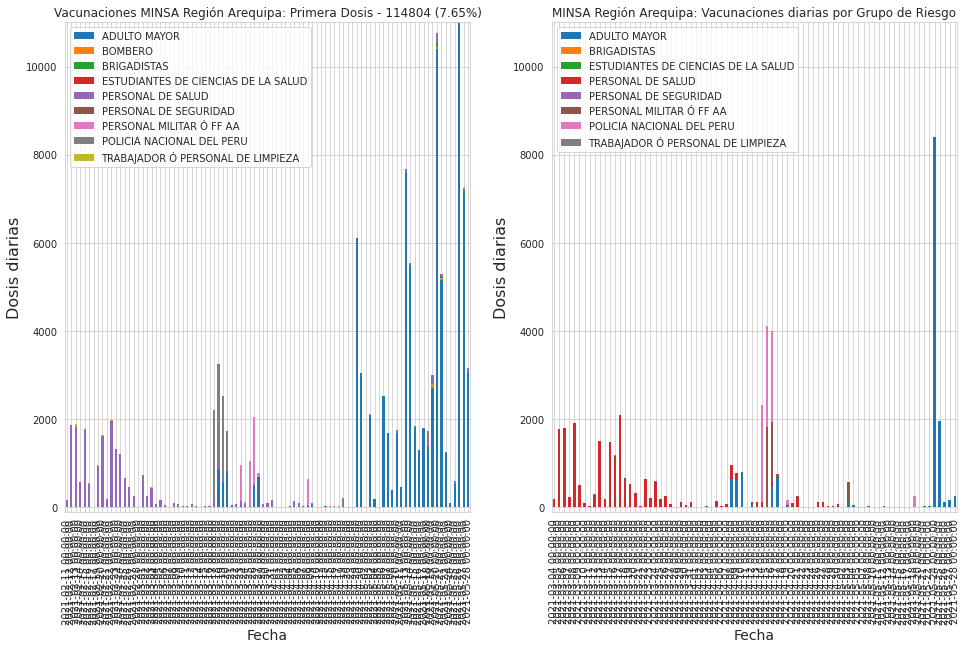

<Figure size 432x288 with 0 Axes>

In [29]:
poblacion_Arequipa = 1500000
 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))


df_AQP_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'] = pd.to_datetime(df_AQP_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION']) 
df_AQP_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'] = pd.to_datetime(df_AQP_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION']) 

df_AQP_diario_dosis_1_por_grupo_riesgo.set_index('FECHA_VACUNACION').plot(kind='bar', stacked = True, linewidth = 0, ax=ax1)
df_AQP_diario_dosis_2_por_grupo_riesgo.set_index('FECHA_VACUNACION').plot(kind='bar', stacked = True, linewidth = 0, ax=ax2)
 
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_title('Vacunaciones MINSA Región Arequipa: Primera Dosis - ' + str(int(df_AQP_diario_dosis_1_por_grupo_riesgo.sum().sum())) + ' (' + str(round(df_AQP_diario_dosis_1_por_grupo_riesgo.sum().sum() / poblacion_Arequipa * 100, 2)) + '%)', fontsize=12)
#ax1.set_xlim([pd.to_datetime('2021-01-01'),pd.to_datetime('2021-04-03')])
ax1.set_ylim(-100,11000)
ax1.xaxis_date() 
ax2.set_ylabel('Dosis diarias', fontsize=16)
ax2.set_xlabel('Fecha', fontsize=14)
ax2.set_title('Vacunaciones MINSA Región Arequipa: Segunda Dosis - ' + str(int(df_AQP_diario_dosis_2_por_grupo_riesgo.sum().sum())) + ' (' + str(round(df_AQP_diario_dosis_2_por_grupo_riesgo.sum().sum() / poblacion_Arequipa * 100, 2)) + '%)', fontsize=12)
#ax2.set_xlim(pd.to_datetime('2021-02-11'),pd.to_datetime('2021-04-08'))
ax2.set_ylim(-100,11000)
 
#ax1.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
#ax2.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
plt.title('MINSA Región Arequipa: Vacunaciones diarias por Grupo de Riesgo',fontsize=12)
plt.savefig('MINSA_ArequipaVacunas_DosisRiesgo.pdf')
plt.show()
plt.clf()

In [30]:
df_arequipa_region.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'PERSONAL DE SEGURIDAD', 'POLICIA NACIONAL DEL PERU',
       'ESTUDIANTES DE CIENCIAS DE LA SALUD', 'PERSONAL MILITAR Ó FF AA',
       'ADULTO MAYOR', 'BRIGADISTAS', 'BOMBERO'], dtype=object)

In [31]:
 grupo_risk = df_arequipa_region.GRUPO_RIESGO.unique()
 df_AQP_grupo_risk1 = df_arequipa_region.query('GRUPO_RIESGO == "PERSONAL DE SALUD"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk2 = df_arequipa_region.query('GRUPO_RIESGO == "TRABAJADOR Ó PERSONAL DE LIMPIEZA"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk3 = df_arequipa_region.query('GRUPO_RIESGO == "PERSONAL DE SEGURIDAD"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk4 = df_arequipa_region.query('GRUPO_RIESGO == "POLICIA NACIONAL DEL PERU"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()

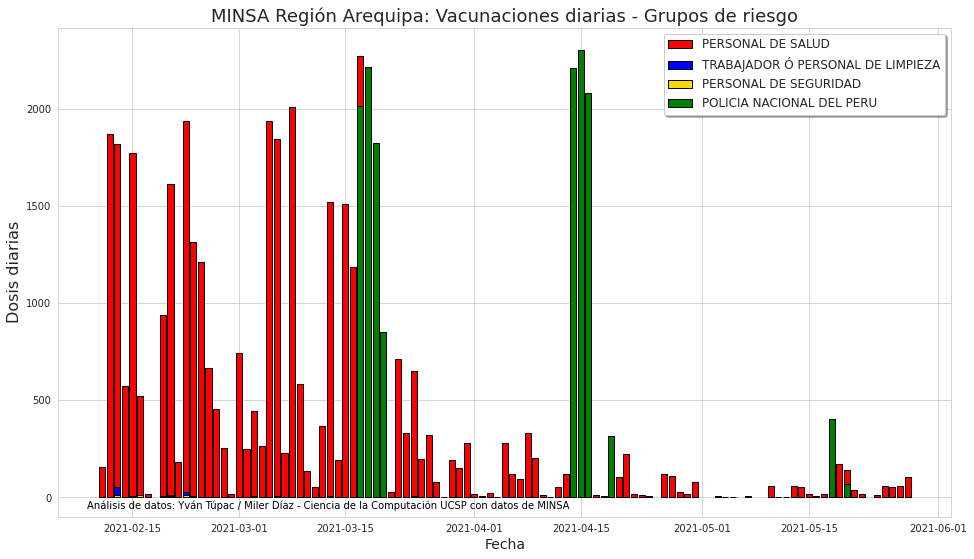

In [32]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
ax1.xaxis_date()
ax1.bar(df_AQP_grupo_risk1.index,df_AQP_grupo_risk1.uno, label=grupo_risk[0], color='red',edgecolor='k')
ax1.bar(df_AQP_grupo_risk2.index,df_AQP_grupo_risk2.uno, label=grupo_risk[1], color='blue',edgecolor='k')
ax1.bar(df_AQP_grupo_risk3.index,df_AQP_grupo_risk3.uno, label=grupo_risk[2], color='gold',edgecolor='k')
ax1.bar(df_AQP_grupo_risk4.index,df_AQP_grupo_risk4.uno, label=grupo_risk[3], color='green',edgecolor='k')
ax1.set_ylim(-100)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-09'), -60, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
plt.title('MINSA Región Arequipa: Vacunaciones diarias - Grupos de riesgo',fontsize=18)
plt.savefig('MINSA_AQPVacunasGruposRiesgo.pdf')
plt.show()